In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

In [142]:
url = 'https://raw.githubusercontent.com/molotkova/skillfactory_rds/master/module_2/stud_math.csv'
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [0]:
def categorical_data(col):
    plt.figure(figsize=(7, 7))
    data_toplot = data[col].value_counts(normalize=True).sort_index()
    graph = sns.countplot(data[col], order=data_toplot.index)
    ax = graph.axes
    for bar, value in zip(ax.patches, data_toplot):
        x_text = bar.get_x() + bar.get_width() / 2
        y_text = bar.get_height()
        ax.annotate('{}%'.format(round(100 * value, 2)), (x_text, y_text), ha='center', va='center',
                    fontsize=11, color='black', rotation=0, xytext=(0, 10), textcoords='offset points')
    plt.show()

def sharex_columns(col1, col2, color1='#ff7f0e', color2='#1f77b4'):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    data_toplot1 = data[col1].value_counts(normalize=True).sort_index()
    data_toplot2 = data[col2].value_counts(normalize=True).sort_index()
    ax.bar(x=data_toplot1.index, height=data_toplot1*100, width=0.4, align='edge', color=color1, label=col1)
    ax.bar(x=data_toplot2.index, height=data_toplot2*100, width=-0.4, align='edge', color=color2, label=col2)
    ax.set_ylabel('frequency, %')
    plt.legend()
    plt.show()
  
def explore_col(column):
  # возвращает число пропусков и уникальные значения
    nan_number = len(data[column][data[column].isna()])
    unique_values = data[column].value_counts()
    print('nan number:', nan_number)
    print('unique values:')
    print(unique_values)

def outliers_detection(col):
    perc25 = data[col].quantile(0.25)
    perc75 = data[col].quantile(0.75)
    IQR = perc75 - perc25
    left = perc25 - 1.5 * IQR
    right = perc75 + 1.5 * IQR
    print('min: {0}, max: {1}'.format(data[col].min(), data[col].max()))
    print('outlier boundaries: [{0}, {1}]'.format(left, right))
    if len(data[~data[col].between(left, right)]) > 0:
        print('number of outliers: {}'.format(len(data[(~data[col].between(left, right))&(~data[col].isna())])))

def drop_outliers(col):
  # удаляет строку, содержащую выброс в колонке col
    perc25 = data[col].quantile(0.25)
    perc75 = data[col].quantile(0.75)
    IQR = perc75 - perc25
    return data[(data[col].between(perc25 - 1.5 * IQR, perc75 + 1.5 * IQR))|(data[col].isna())]

Датасет содержит информацию об условиях жизни школьников и результатах экзамена по математике. Задача отследить, какие факторы повлияли на успеваемость студентов. 

Вначале иследуем подробнее данные в каждом столбце.
##score
Баллы, набранные на экзамене по математике

In [0]:
explore_col('score')

nan number: 6
unique values:
50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


Похоже, что оценивание происходило по 100-бальной шкале. Посмотрим на распределение оценок среди студентов. Для этого разобьём их на категории и добавим новую колонку в датафрейм.

A - 100-75 баллов

B - 75-50 баллов

C - 50-25 баллов

D - 25-0 баллов

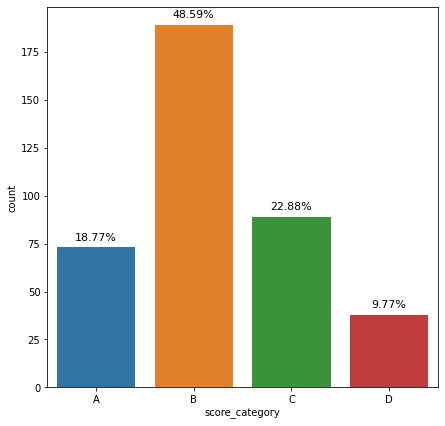

In [144]:
def categorize_score(score):
    if score >= 75.0:
        return 'A'
    if score < 75.0 and score >= 50.0:
        return 'B'
    if score < 50.0 and score >= 25.0:
        return 'C'
    if score < 25.0:
        return 'D'
  
data['score_category'] = data['score']
data.score_category = data.score_category.apply(categorize_score) # добавили новый столбец с категориями оценок

categorical_data('score_category')

Почти половина учащихся хорошо справилась с экзаменом, набрав от 50 до 75 баллов. Посмотрим, содержит ли колонка выбросы.

In [145]:
outliers_detection('score')

min: 0.0, max: 100.0
outlier boundaries: [-5.0, 115.0]
number of outliers: 0


##school

nan number: 0
unique values:
GP    349
MS     46
Name: school, dtype: int64


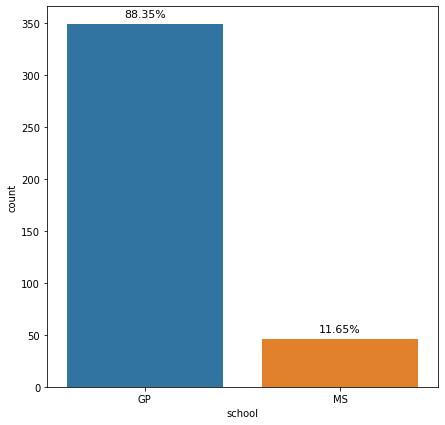

In [146]:
explore_col('school')
categorical_data('school')

Хм, в датасете представлено всего две школы, причём 90% детей учатся в школе GP. 

##sex

F - девочки

M - мальчики

nan number: 0
unique values:
F    208
M    187
Name: sex, dtype: int64


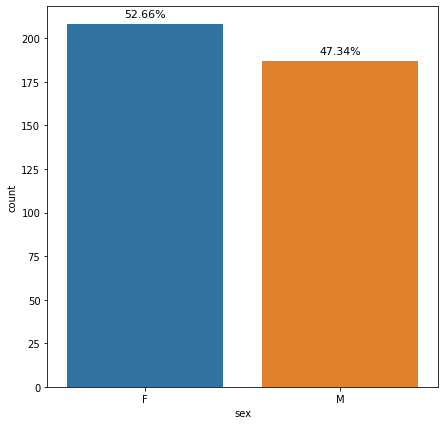

In [0]:
explore_col('sex')
categorical_data('sex')

В датасете примерно одинаковое количество мальчиков и девочек. Это хорошо, сможем проверить, влияет ли пол на результат. Есть мнение, что в школе девочки более старательны и получают более высокие оценки.

## age

nan number: 0
unique values:
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


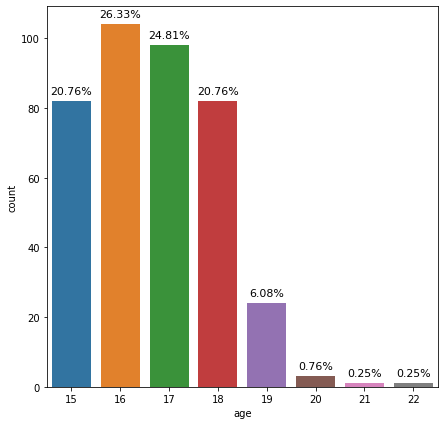

min: 15, max: 22
outlier boundaries: [13.0, 21.0]
number of outliers: 1


In [0]:
explore_col('age')
categorical_data('age')
outliers_detection('age')

Колонка содержит один выброс - учащийся в возрасте 22 лет. Этот возраст кажется очень необычным для школьника. Удалим его, чтобы избежать сюпризов в дальнейшем.

In [0]:
data = drop_outliers('age')

## address

U - городской

R - за городом

nan number: 17
unique values:
U    294
R     83
Name: address, dtype: int64


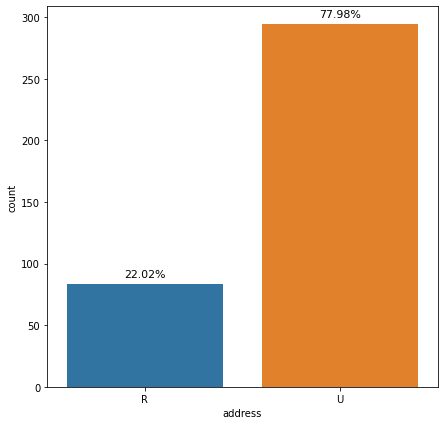

In [0]:
explore_col('address')
categorical_data('address')

## famsize
Размер семьи

GT3 - больше трёх человек

LE3 - не больше трёх человек

nan number: 27
unique values:
GT3    260
LE3    107
Name: famsize, dtype: int64


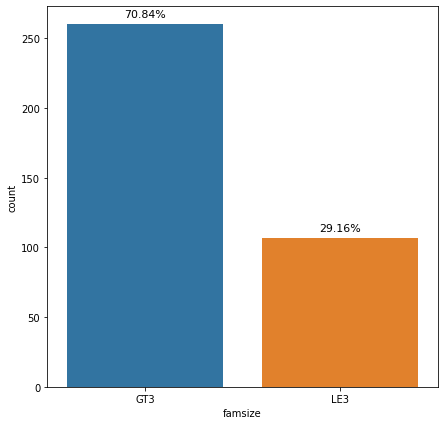

In [0]:
explore_col('famsize')
categorical_data('famsize')

Больше 2/3 семей, в которых больше 3 человек. Учитывая, что в современном мире люди чаще живут небольшими семьями (папа, мама, один, реже два ребёнка), интересно посмотреть связан ли этот фактор с успеваемостью школьников.

## Pstatus
Статус совместного жилья родителей

nan number: 45
unique values:
T    313
A     36
Name: Pstatus, dtype: int64


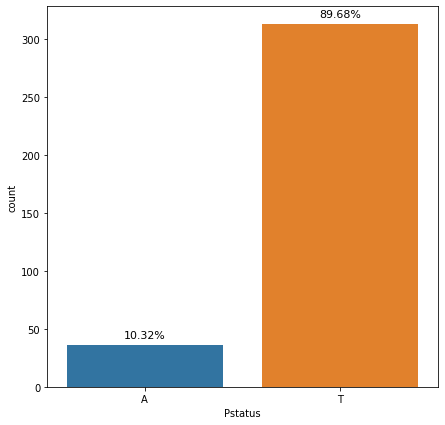

In [0]:
explore_col('Pstatus')
categorical_data('Pstatus')

1) В этом столбце много пропусков.

2) В основном родители живут вместе. Но что с 10 %, которые живут раздельно? Часто причиной раздельного жилья является развод - большой стресс для ребёнка. Отражается ли это на результиатах экзамена?

## Medu, Fedu
Образование отца и матери

0 - нет

1 - 4 класса

2 - 5-9 классы

3 - среднее специальное или 11 классов

4 - высшее

In [0]:
print('Образование отца')
explore_col('Medu')
print('Образование матери')
explore_col('Fedu')

Образование отца
nan number: 3
unique values:
4.0    131
2.0    102
3.0     96
1.0     59
0.0      3
Name: Medu, dtype: int64
Образование матери
nan number: 24
unique values:
2.0     106
3.0      96
4.0      88
1.0      77
0.0       2
40.0      1
Name: Fedu, dtype: int64


Данные об образовании матери содержат странное значение 40, наверняка это ошибка. Удалим это значение.

In [0]:
error_value_idx = data[data.Fedu == 40].index[0]
data.iloc[error_value_idx, 7] = np.nan

In [0]:
print('Образование матери')
explore_col('Fedu')

Образование матери
nan number: 25
unique values:
2.0    106
3.0     96
4.0     88
1.0     77
0.0      2
Name: Fedu, dtype: int64


Теперь всё хорошо. Сравним степени образования родителей.

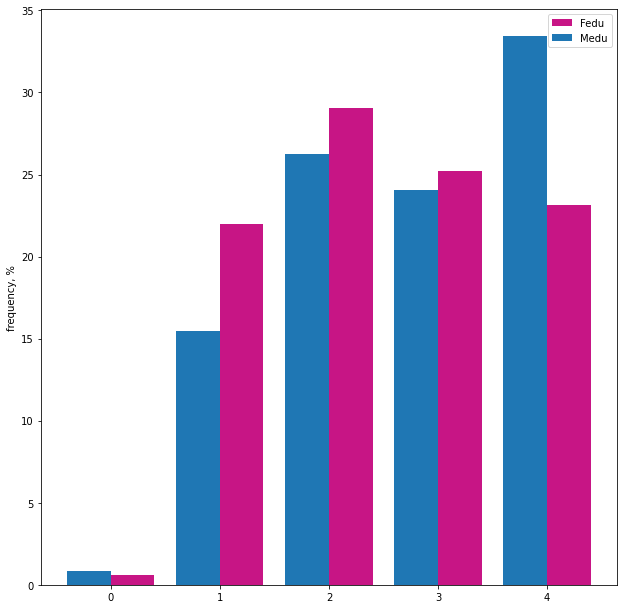

In [0]:
sharex_columns('Fedu', 'Medu', 'mediumvioletred', '#1f77b4')

Интересно, что матерей со средним или школьным образованием больше тем отцов, но высшее образование на 10% чаще имеют папы чем мамы.

## Mjob, Fjob
Работа отца и матери

teacher - учитель

health - сфера здравоохранения

services - гос служба

at_home - не работает

other - другое

In [0]:
print('Работа отца')
explore_col('Mjob')
print('Работа матери')
explore_col('Fjob')

Работа отца
nan number: 19
unique values:
other       133
services     97
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64
Работа матери
nan number: 36
unique values:
other       197
services    101
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


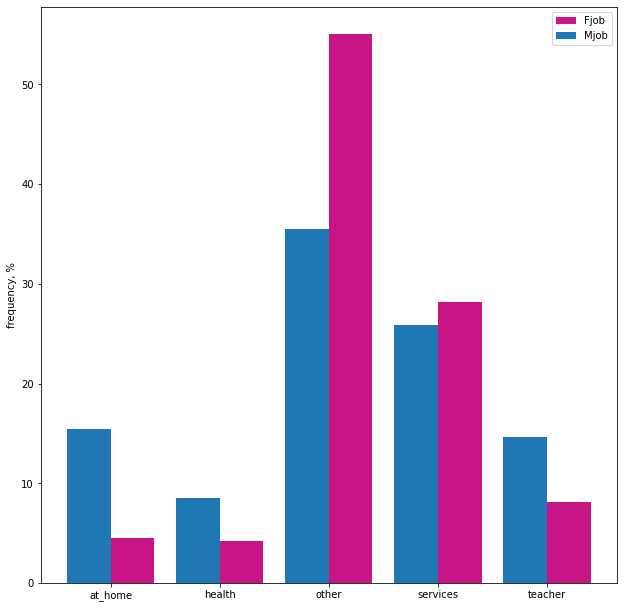

In [149]:
sharex_columns('Fjob', 'Mjob', 'mediumvioletred', '#1f77b4')

In [0]:
print('Число семей, где только папа работает из дома: {0}, только мама: {1},  оба: {2}'
      .format(len(data[(data.Mjob=='at_home')&(data.Fjob!='at_home')]),
              len(data[(data.Fjob=='at_home')&(data.Mjob!='at_home')]),
              len(data[(data.Mjob=='at_home')&(data.Fjob=='at_home')])))
print('Число семей, где только папа - учитель: {0}, только мама: {1},  оба: {2}'
      .format(len(data[(data.Mjob=='teacher')&(data.Fjob!='teacher')]),
              len(data[(data.Fjob=='teacher')&(data.Mjob!='teacher')]),
              len(data[(data.Mjob=='teacher')&(data.Fjob=='teacher')])))

Число семей, где только папа работает из дома: 53, только мама: 11,  оба: 5
Число семей, где только папа - учитель: 44, только мама: 18,  оба: 11


В датасете довольно много учащихся, у которых хотя бы один из родителей работает из дома или работает учителем. Это может быть связано с успеваемостью школьников.

##reason
Причина выбора школы

home - близость к дому

reputation - репутация школы

course - образовательная программа

other - другое

nan number: 17
unique values:
course        137
home          104
reputation    103
other          33
Name: reason, dtype: int64


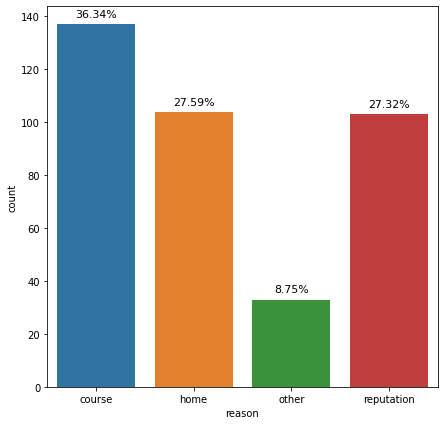

In [0]:
explore_col('reason')
categorical_data('reason')

Большинство семей выбрали определённую школу из-за образовательной программы. Вспомним, что в датасете 90% учащихся из школы GP. Может быть причина этому - образовательная программа?

In [0]:
table_by_reason = data.pivot_table(values='sex', index=['reason'], columns=['school'], aggfunc='count')
stud_GP = len(data[(data.school=='GP')&(~data.reason.isna())])
stud_MS = len(data[(data.school=='MS')&(~data.reason.isna())])
table_by_reason['proportion_GP, %'] = (table_by_reason['GP']/stud_GP*100).round(2)
table_by_reason['proportion_MS, %'] = (table_by_reason['MS']/stud_MS*100).round(2)
print(table_by_reason)


school       GP  MS  proportion_GP, %  proportion_MS, %
reason                                                 
course      119  18             35.52             42.86
home         94  10             28.06             23.81
other        24   9              7.16             21.43
reputation   98   5             29.25             11.90


Несмотря на то, что в датасете всего 10% ребят учатся в школе MS, 43% семей выбрали эту школу по причине образовательной программы. В то же время школу GP (90% всех учащихся) по этой же причине выбрало 36% семей.

##guardian
Опекун

nan number: 31
unique values:
mother    249
father     86
other      28
Name: guardian, dtype: int64


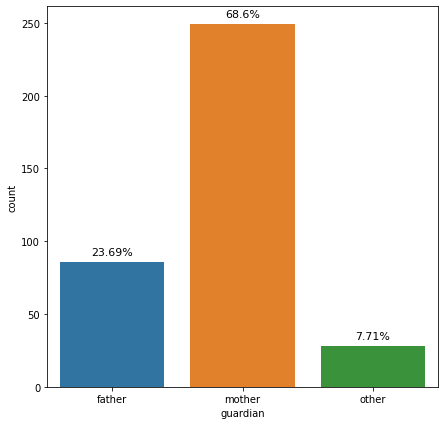

In [0]:
explore_col('guardian')
categorical_data('guardian')

##traveltime
Время в пути до школы

1 - меньше 15 мин.

2 - 15-30 мин.

3 - 30-60 мин.

4 - больше 60 мин.

nan number: 28
unique values:
1.0    241
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


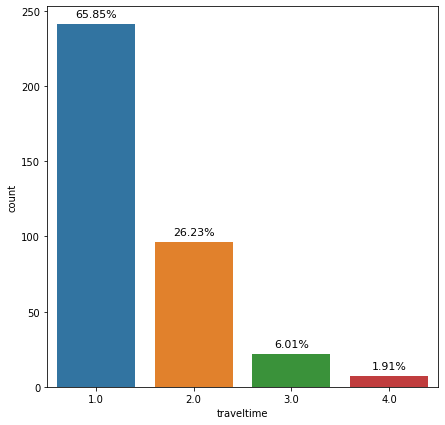

In [0]:
explore_col('traveltime')
categorical_data('traveltime')

Заметно, что в основном люди предпочитают выбирать школу не более чем в 15 минутах от дома. 

##studytime
Время на учёбу помимо школы в неделю

1 - меньше 2 часов

2 - 2-5 часов

3 - 5-10 часов

4 - больше 10 часов

nan number: 7
unique values:
2.0    194
1.0    102
3.0     64
4.0     27
Name: studytime, dtype: int64


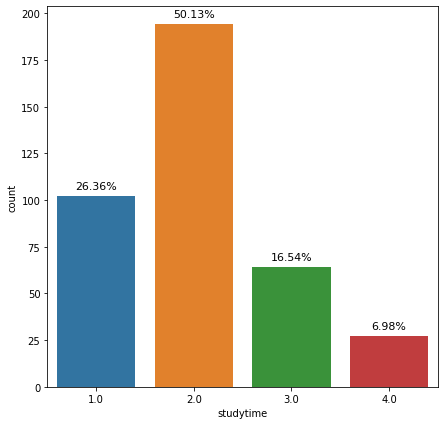

In [0]:
explore_col('studytime')
categorical_data('studytime')

В основном на дополнительные занятия студенты тратят 2-5 часов в неделю.

В датасете есть загадочная колонка *studytime, granular*, посмотрим на неё:

In [0]:
explore_col('studytime, granular')

nan number: 7
unique values:
-6.0     194
-3.0     102
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64


Информации о том, что могут значить эти данные нет, а статистика уникальных значений совпадает с колонкой *studytime*.

Колонку *studytime, granular* удалим.

In [0]:
data.drop(['studytime, granular'], inplace=True, axis=1)

##failures
Количество внеучебных неудач

n - количество неудач, меньше 3

3 - если неудач 3 и больше

nan number: 22
unique values:
0.0    293
1.0     49
2.0     16
3.0     14
Name: failures, dtype: int64


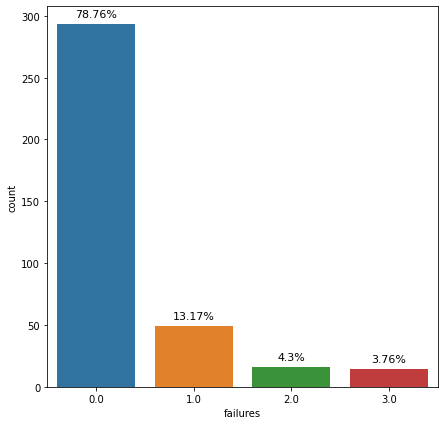

In [0]:
explore_col('failures')
categorical_data('failures')

Почти 80% студентов не сталкивались с внеучебными неудачами. Интересно, есть ли разница между результатами экзамена у студентов, которые сталкивались с провалами, с теми, у которых всё пока идёт "ровно"? Говорят, неудачи закаляют.

##yes/no data
Следующие восемь колонок датасета содержат различные факты с двумя вариантами ответа. Сначала посмотрим, что это за факты:

*schoolsup* - семейная образовательная поддержка

*famsup* — семейная образовательная поддержка (yes или no)

*paid* — дополнительные платные занятия по математике (yes или no)

*activities* — дополнительные внеучебные занятия (yes или no)

*nursery* — посещал детский сад (yes или no)

*higher* — хочет получить высшее образование (yes или no)

*internet* — наличие интернета дома (yes или no)

*romantic* — в романтических отношениях (yes или no)

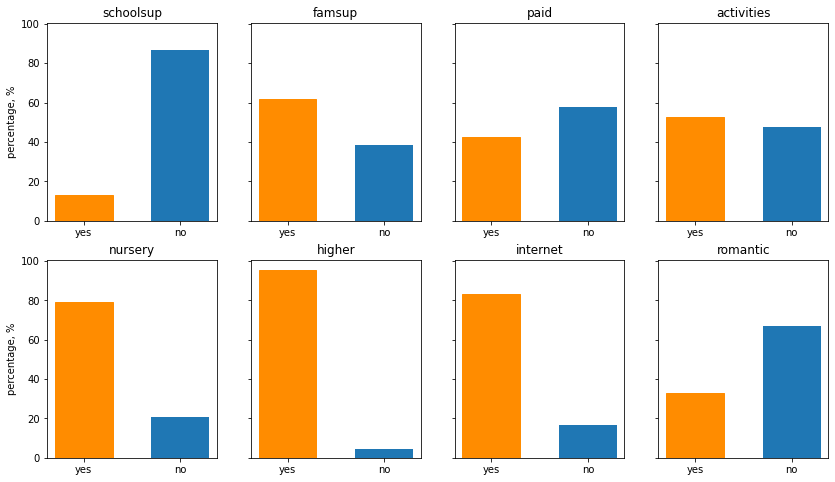

In [0]:
yes_no = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery',
          'higher', 'internet', 'romantic']

fig, axes = plt.subplots(2, 4, figsize=(14,8), sharey=True)
for col, i in zip(yes_no[:4], range(4)): # 0 row in axes
    data_toplot = data[col].value_counts(normalize=True).sort_index(ascending=False)
    bars = axes[0][i].bar(x=data_toplot.index, height=round(data_toplot*100, 2), width=0.6, label=col)
    axes[0][i].set_title(col)
    bars[0].set_color('darkorange')
axes[0][0].set_ylabel('percentage, %')
axes[1][0].set_ylabel('percentage, %')
for col, i in zip(yes_no[4:], range(4)): # 1 row in axes
    data_toplot = data[col].value_counts(normalize=True).sort_index(ascending=False)
    bars = axes[1][i].bar(x=data_toplot.index, height=round(data_toplot*100, 2), width=0.6, label=col)
    axes[1][i].set_title(col)
    bars[0].set_color('darkorange')
plt.show()

Параметры *nursery*, *higher*, *internet* имеют большой перевес положительных ответов.


## famrel
от 1 - очень плохо до 5 - очень хорошо


In [0]:
explore_col('famrel')

nan number: 27
unique values:
 4.0    182
 5.0     98
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64


Колонка содержит непонятное значение -1, удалим его.

In [0]:
error_value_idx = data[data.famrel == -1].index[0]
data.iloc[error_value_idx, -7] = np.nan

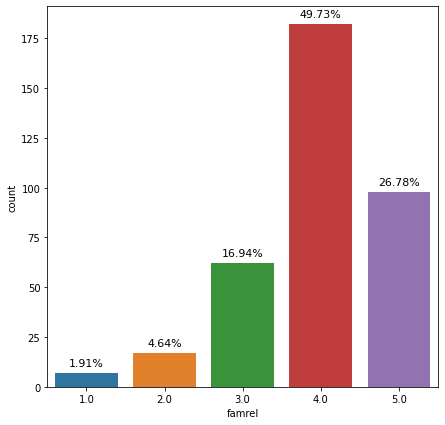

In [153]:
categorical_data('famrel')

В основном отношения в семье хорошие.

##freetime
Свободное время после школы
##goout
Проведение времени с друзьями

от 1 - очень мало до 5 - очень много

Свободное время
nan number: 9
unique values:
3.0    143
4.0    105
2.0     57
5.0     36
1.0     15
Name: freetime, dtype: int64
Время с друзьями
nan number: 8
unique values:
3.0    119
2.0     95
4.0     77
5.0     45
1.0     21
Name: goout, dtype: int64


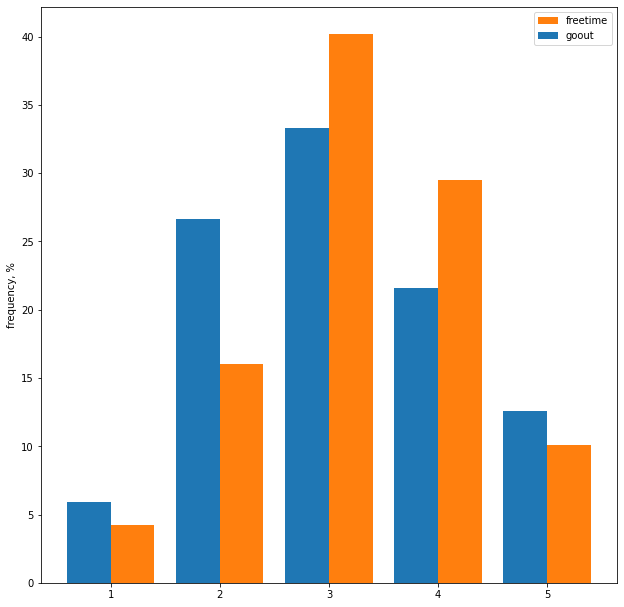

In [0]:
print('Свободное время')
explore_col('freetime')
print('Время с друзьями')
explore_col('goout')
sharex_columns('freetime', 'goout')

Кажется, что оба параметра имеют нормальное распределение.

##health
Текущее состояние здоровья

от 1 - очень плохо до 5 - очень хорошо


nan number: 15
unique values:
5.0    138
3.0     89
4.0     63
1.0     46
2.0     43
Name: health, dtype: int64


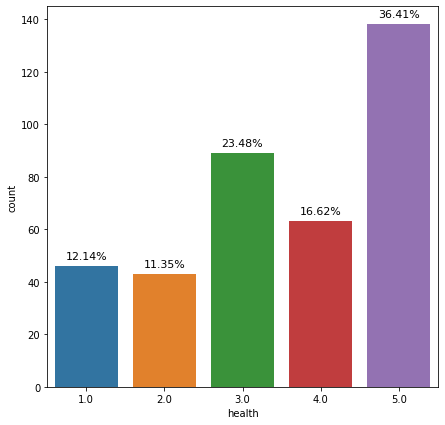

In [0]:
explore_col('health')
categorical_data('health')

Большинство студентов имеют отличное здоровье, 17% хорошее, около 20% нормальное, остальные 20% плохое или очень плохое. 

##absences
Количество пропущенных занятий

In [0]:
explore_col('absences')
outliers_detection('absences')

nan number: 12
unique values:
0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       6
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64
min: 0.0, max: 385.0
outlier boundaries: [-12.0, 20.0]
number of outliers: 17


Колонка содержит экстремально большие значения. Удалим выбросы, чтобы избежать смещений при дальнейшем анализе.

In [0]:
data = drop_outliers('absences')

В итоге получаем такую статистику пропусков:

In [123]:
data.absences.describe().round()

count    365.0
mean       5.0
std        5.0
min        0.0
25%        0.0
50%        4.0
75%        7.0
max       20.0
Name: absences, dtype: float64

##Корреляционный анализ
Посмотрим, корреляцию численных параметров с результатами экзамена.

In [125]:
numeric_col = ['age', 'absences', 'score']
data[numeric_col].corr()

,age,absences,score
age,1.000000,0.129016,-0.161042
absences,0.129016,1.000000,0.085250
score,-0.161042,0.085250,1.000000


Отрицательная корреляция параметров *age* и *score* может говорить о том, что ученики более старшего возраста по каким-то причинам менее замотивированы получать высокие оценки или, например, экзамен для учащихся более старшего возраста был сложнее.

Переменные *absences* и *score* слабоскоррелированы. Потенциально количество пропусков не сильно влияет на результат экзамена, довольно неочевидный факт.

##Анализ номинативных переменных


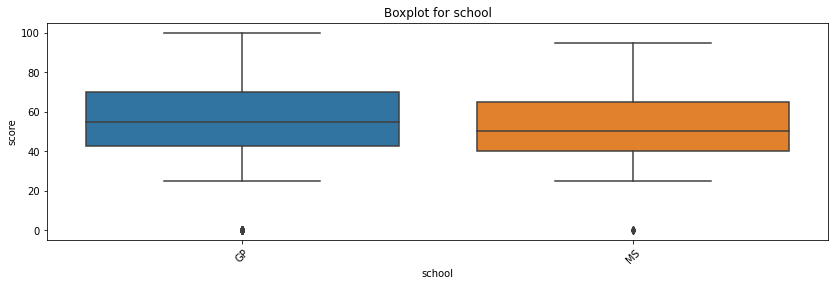

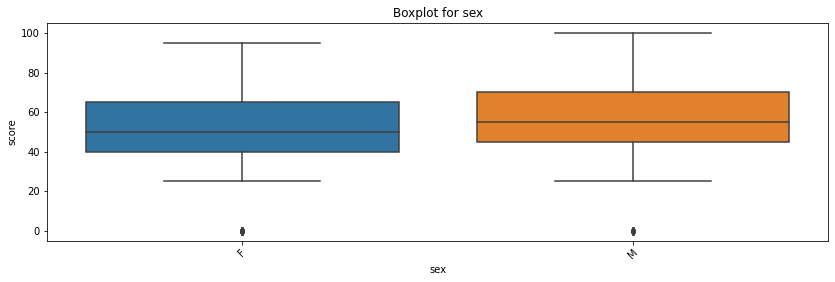

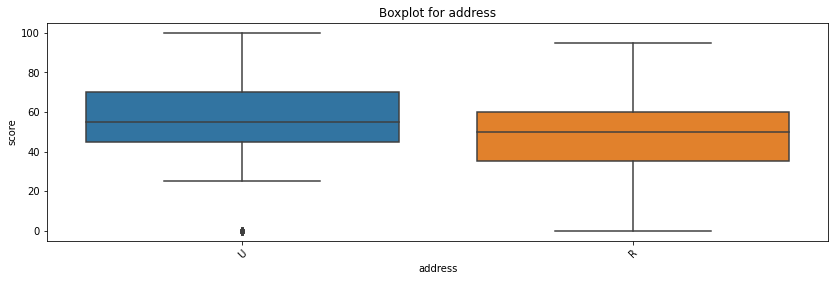

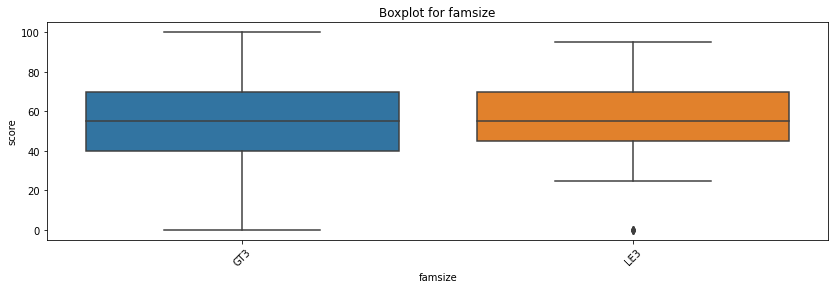

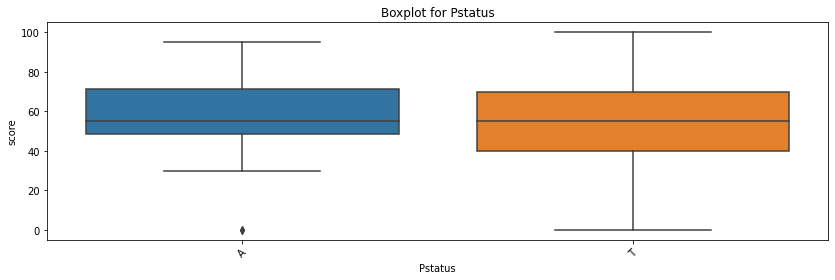

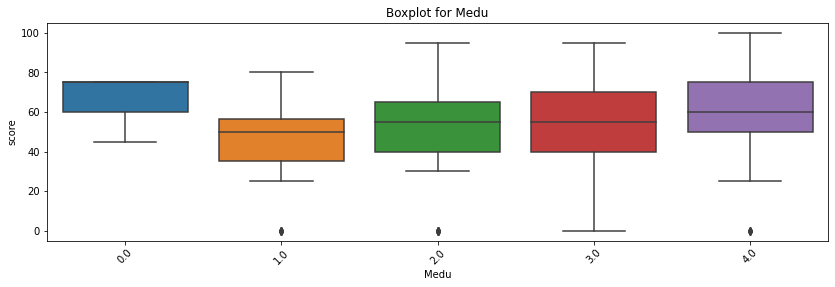

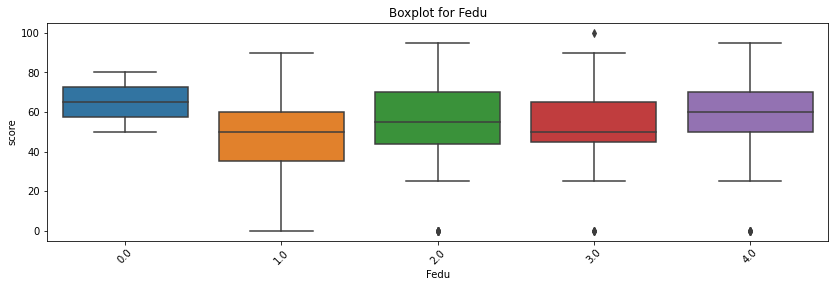

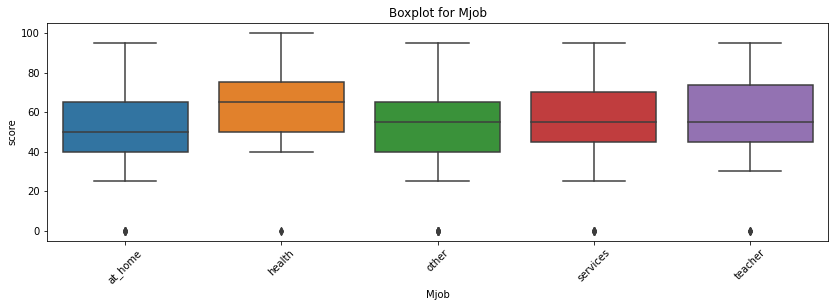

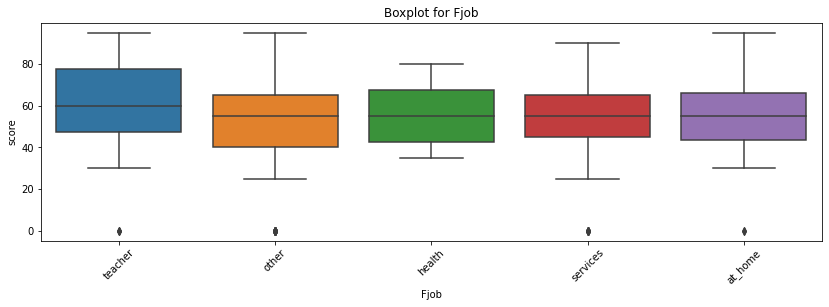

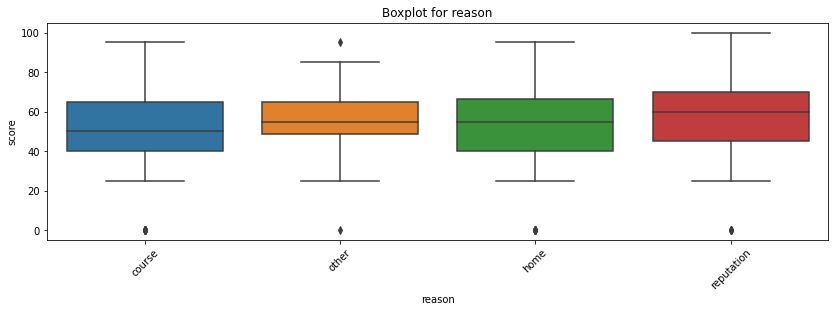

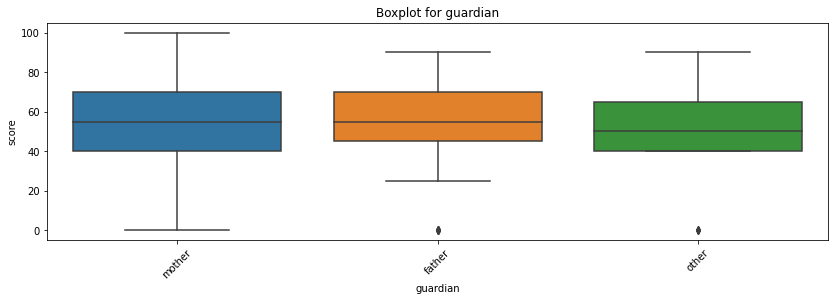

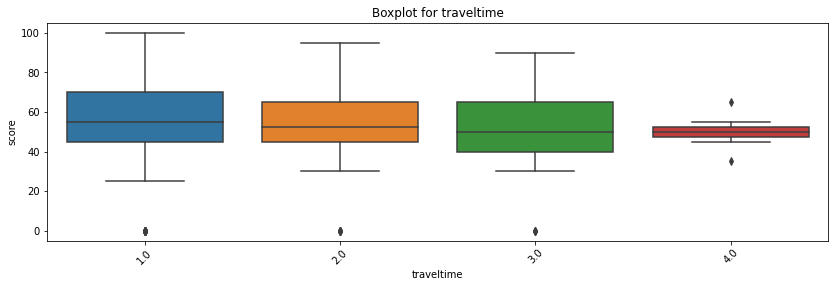

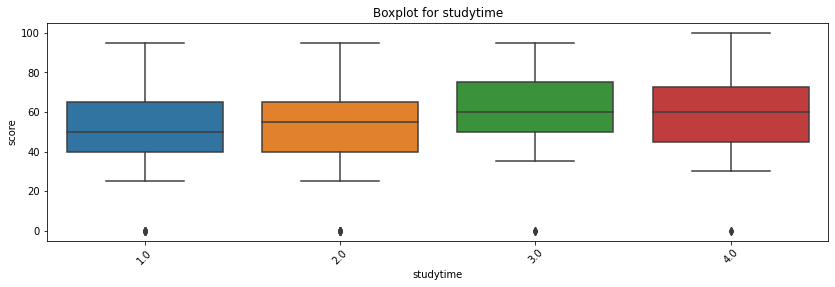

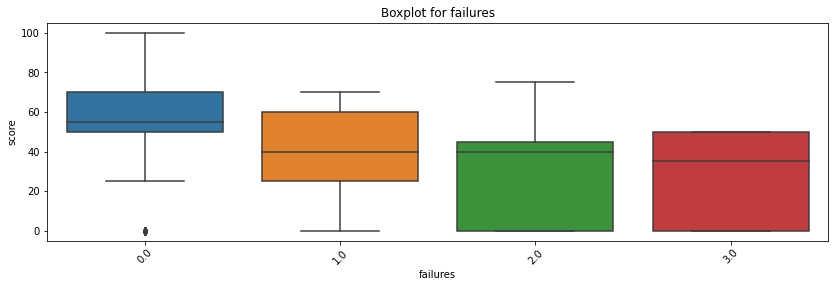

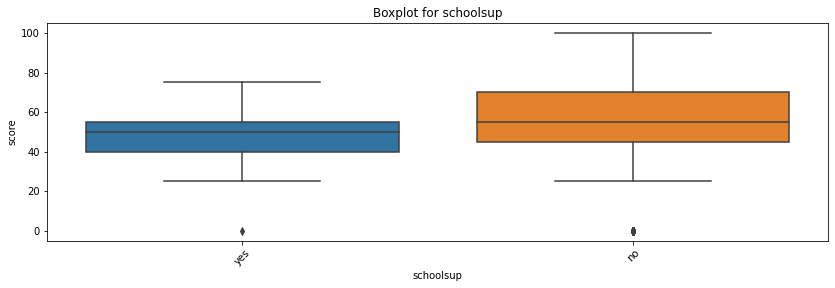

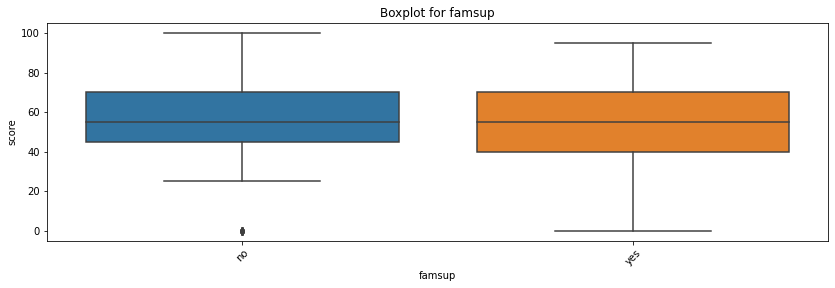

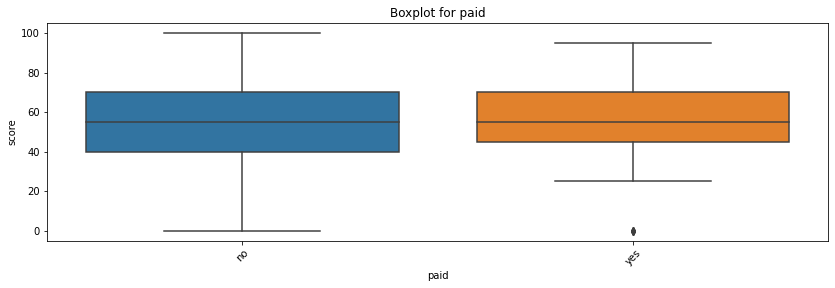

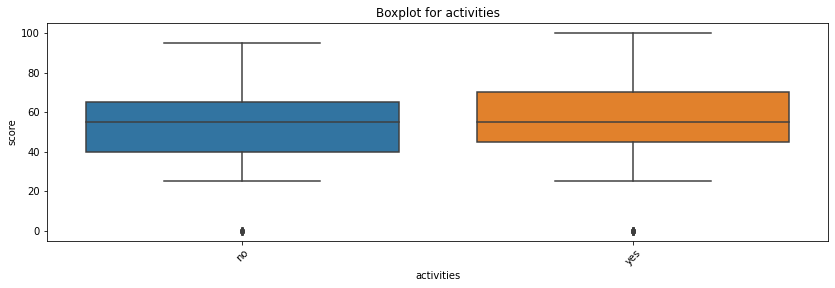

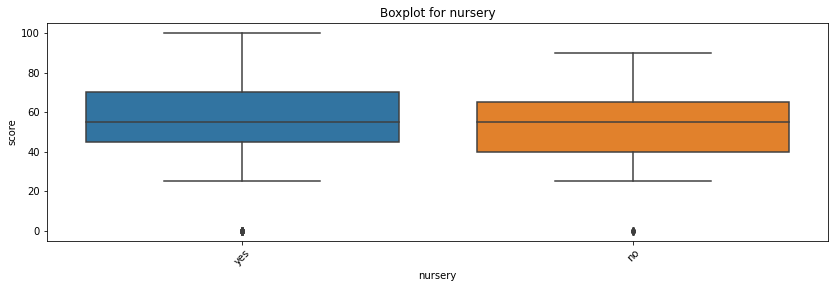

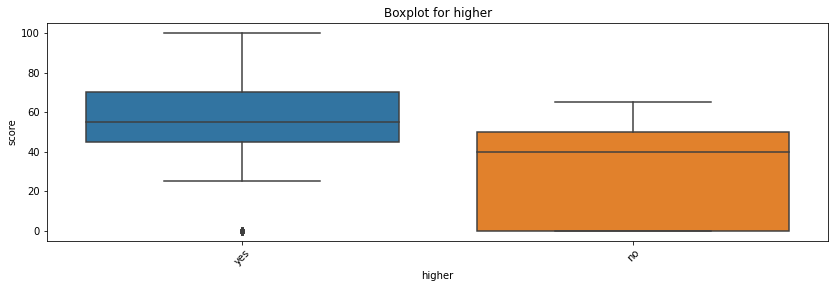

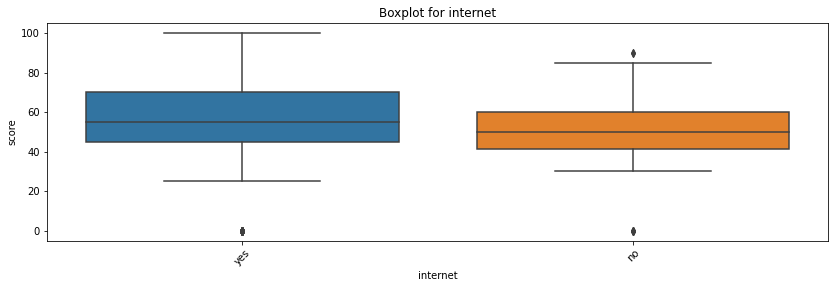

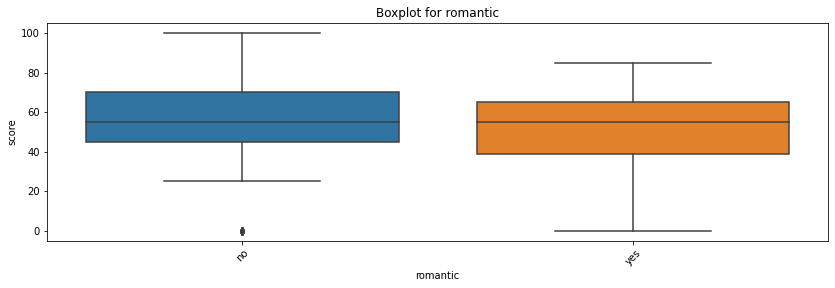

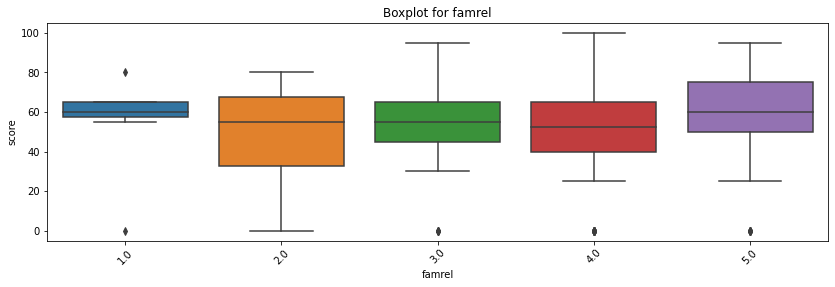

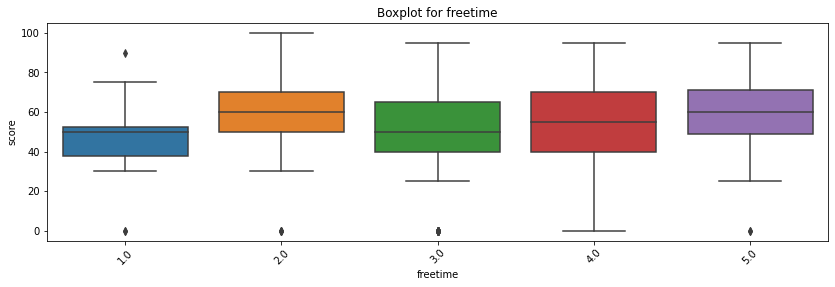

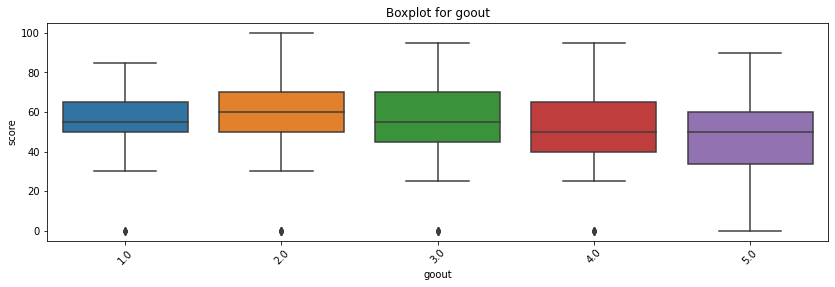

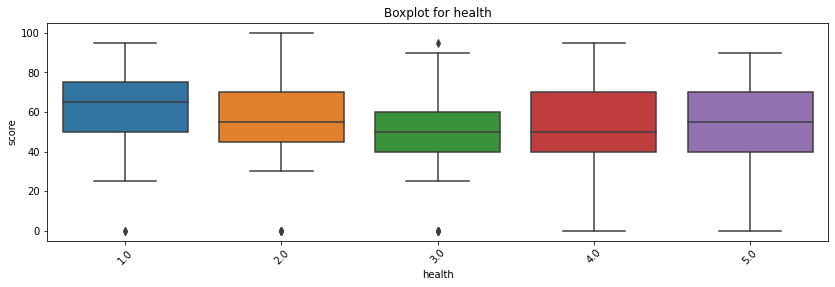

In [155]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=data,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

categorical_col = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
                   'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
                   'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']

for col in categorical_col:
  get_boxplot(col)

Из графиков видно, что параметры *famsize*, *activities*, *nursery* скорее всего не влияют на результат экзамена.

Ещё интересно, что параметры *Pstatus* и *paid* не влияют на среднюю оценку за экзмен, но существенно поднимают минимальное количество баллов.

In [187]:
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'].dropna(),
                        data.loc[data.loc[:, column] == comb[1], 'score'].dropna(), equal_var=False).pvalue \
            <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

categorical_col = ['school', 'sex', 'address', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
                   'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
                   'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']

for col in categorical_col:
  get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


##Результаты
Корреляционный и статистический анализ показали, что на результаты экзамена могут влиять параметры: *age*, *absences*, *sex*, *address*, *Medu*, *Mjob*, *failures*, *schoolsup*, *paid*, *higher*, *romantic*.


In [190]:
data_for_model = data[['age', 'absences', 'sex', 'address', 'Medu', 'Mjob', 'failures', 'schoolsup', 'paid', 'higher', 'romantic', 'score']]
data_for_model.head()

,age,absences,sex,address,Medu,Mjob,failures,schoolsup,paid,higher,romantic,score
0,18,6.0,F,U,4.0,at_home,0.0,yes,no,yes,no,30.0
1,17,4.0,F,U,1.0,at_home,0.0,no,no,yes,no,30.0
2,15,10.0,F,U,1.0,at_home,3.0,yes,NaN,yes,NaN,50.0
3,15,2.0,F,U,4.0,health,0.0,no,yes,yes,yes,75.0
4,16,4.0,F,U,3.0,other,0.0,no,yes,yes,no,50.0


Колонки содержат не очень много пропусков (максимум встретилось около 10% пропущенных значений в колонке). Наконец, в данных было найдено не много ошибок и выбросов, что говорит о качестве датасета. 